### Decision tree classification

1. Read the data
2. Create Lab Encoder For categorical
3. Split the data into train and test
4. Build a Decision tree with default hyper parameters and check the model performance
5. Try to change the hyper parameter and check the model performance
6. Use Grid search to find the best tuning parameter
7. Visualize the tree structure of the final model
8. Construct a Logistic Regression Model and compare results with Decision Tree

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np



#### 1.  Read the data (new_bank.csv)

In [2]:
Bank_data = pd.read_csv("bank.csv")
Bank_data.head()


,age,marital,balance,loan,contact,y
0,30,married,1787,no,cellular,no
1,33,married,4789,yes,cellular,no
2,35,single,1350,no,cellular,no
3,30,married,1476,yes,unknown,no
4,59,married,0,no,unknown,no


In [3]:
Bank_data.dtypes


age         int64
marital    object
balance     int64
loan       object
contact    object
y          object
dtype: object

#### 2. Label Encoding

In [4]:

cat_cols = Bank_data.select_dtypes(include='object')
num_cols = Bank_data.select_dtypes(exclude='object')



In [5]:

from sklearn.preprocessing import LabelEncoder


In [6]:
for i in range(0,len(Bank_data.columns)):
    j=Bank_data.columns[i]
    if(j in cat_cols):
        label_encoder = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
        label_encoder.fit(Bank_data[j])
        Bank_data[j]  = label_encoder.transform(Bank_data[j])
        Bank_data[j]  = Bank_data[j].astype('category')

In [7]:
Bank_data.head()


,age,marital,balance,loan,contact,y
0,30,1,1787,0,0,0
1,33,1,4789,1,0,0
2,35,2,1350,0,0,0
3,30,1,1476,1,2,0
4,59,1,0,0,2,0


In [8]:
Bank_data.dtypes



age           int64
marital    category
balance       int64
loan       category
contact    category
y          category
dtype: object

In [9]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})


In [10]:
inspect_data(Bank_data)



,Data Type,No of Levels,Levels
age,int64,67,[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 ...
marital,category,3,"[1, 2, 0]\nCategories (3, int64): [1, 2, 0]"
balance,int64,2353,[ 1787 4789 1350 ... -333 -3313 1137]
loan,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"
contact,category,3,"[0, 2, 1]\nCategories (3, int64): [0, 2, 1]"
y,category,2,"[0, 1]\nCategories (2, int64): [0, 1]"


### Stats for Target variable

0    4000
1     521
Name: y, dtype: int64


Text(0, 0.5, 'Frequency')

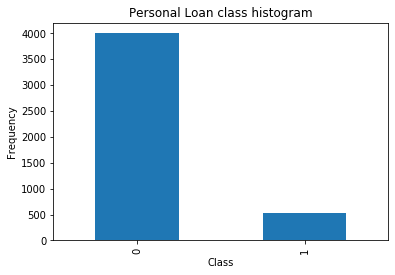

In [11]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(Bank_data['y'], sort = True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Personal Loan class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### Train-Test Split

In [12]:
Target   = Bank_data['y']
Features = Bank_data[Bank_data.columns.difference(['y'])]


In [13]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20,stratify=Target)



In [14]:
y_test.head()


339     0
3426    0
3143    0
1896    0
659     0
Name: y, dtype: category
Categories (2, int64): [0, 1]

In [50]:
## Print the shape of X_train, X_test, y_train, y_test
print(" Shape of Train data features                      :" , X_train.shape)
print(" Shape of Train data target                        :" , y_train.shape)
print(" Shape of test data features                       :" , X_test.shape)
print(" Shape of test data target                         :" , y_test.shape)
print(" Proportion of target distribution for train data  : \n" , y_train.value_counts()/sum(y_train.value_counts()))
print(" Proportion of target distribution for train data  :\n" , y_test.value_counts()/sum(y_test.value_counts()))

 Shape of Train data features                      : (3616, 5)
 Shape of Train data target                        : (3616,)
 Shape of test data features                       : (905, 5)
 Shape of test data target                         : (905,)
 Proportion of target distribution for train data  : 
 0    0.884679
1    0.115321
Name: y, dtype: float64
 Proportion of target distribution for train data  :
 0    0.885083
1    0.114917
Name: y, dtype: float64


#### Decsion Tree with Default Parameters

In [16]:
# Defining the model
# Fit / train the model
DT_Model1 = tree.DecisionTreeClassifier()

DT_Model1.fit(X_train,y_train)



DecisionTreeClassifier()

In [17]:
# Get the prediction for both train and test
Prediction_Train_Model1 = DT_Model1.predict(X_train)
Prediction_Test_Model1 = DT_Model1.predict(X_test)


#### Confusion matrix and Classification Report on Train

In [18]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [19]:
def get_metircs(actuals,predictions):
    results = confusion_matrix(actuals,predictions) 
    print('Confusion Matrix :\n',results)
    print('Accuracy Score :',accuracy_score(actuals,predictions)) 
    print('Report : ')
    print(classification_report(actuals,predictions))
    
    

In [20]:
get_metircs(y_train,Prediction_Train_Model1)


Confusion Matrix :
 [[3198    1]
 [  18  399]]
Accuracy Score : 0.994745575221239
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3199
           1       1.00      0.96      0.98       417

    accuracy                           0.99      3616
   macro avg       1.00      0.98      0.99      3616
weighted avg       0.99      0.99      0.99      3616



#### Confusion matrix and Classification Report on Test

In [21]:
get_metircs(y_test,Prediction_Test_Model1)

Confusion Matrix :
 [[710  91]
 [ 84  20]]
Accuracy Score : 0.8066298342541437
Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       801
           1       0.18      0.19      0.19       104

    accuracy                           0.81       905
   macro avg       0.54      0.54      0.54       905
weighted avg       0.81      0.81      0.81       905



### Use Grid search to find the best tuning parameters of Decision Tree


In [22]:
list(range(2,10,1))

[2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
# Define the parameters to be tuned and the ranges that you want to check
# Define the grid search experiemnt
# Fit the grid search on train
# Check the best validation score
# Check the best parameters choosen

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,5,1)), 
              "min_samples_leaf": list(range(5,7,1))}


DT_gridsearch = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=tree_params,n_jobs=1,cv=10)
DT_gridsearch.fit(X_train,y_train)
print(DT_gridsearch.best_score_)
print(DT_gridsearch.best_params_)



0.8860631150426226
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6}


In [24]:
DT_Mode12 = DT_gridsearch.best_estimator_
Prediction_Train_Model2 = DT_Mode12.predict(X_train)
Prediction_Test_Mode12 = DT_Mode12.predict(X_test)



In [25]:

get_metircs(y_train,Prediction_Train_Model2)



Confusion Matrix :
 [[3197    2]
 [ 408    9]]
Accuracy Score : 0.8866150442477876
Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3199
           1       0.82      0.02      0.04       417

    accuracy                           0.89      3616
   macro avg       0.85      0.51      0.49      3616
weighted avg       0.88      0.89      0.84      3616



In [26]:
get_metircs(y_test,Prediction_Test_Mode12)

Confusion Matrix :
 [[799   2]
 [104   0]]
Accuracy Score : 0.8828729281767956
Report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       801
           1       0.00      0.00      0.00       104

    accuracy                           0.88       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.78      0.88      0.83       905



#### 7. Visualize the tree structure of the best tree

[Text(558.0, 453.0, 'contact <= 1.5\ngini = 0.204\nsamples = 3616\nvalue = [3199, 417]'),
 Text(279.0, 271.8, 'age <= 60.5\ngini = 0.248\nsamples = 2551\nvalue = [2181, 370]'),
 Text(139.5, 90.59999999999997, '\n  (...)  \n'),
 Text(418.5, 90.59999999999997, '\n  (...)  \n'),
 Text(837.0, 271.8, 'age <= 58.5\ngini = 0.084\nsamples = 1065\nvalue = [1018, 47]'),
 Text(697.5, 90.59999999999997, '\n  (...)  \n'),
 Text(976.5, 90.59999999999997, '\n  (...)  \n')]

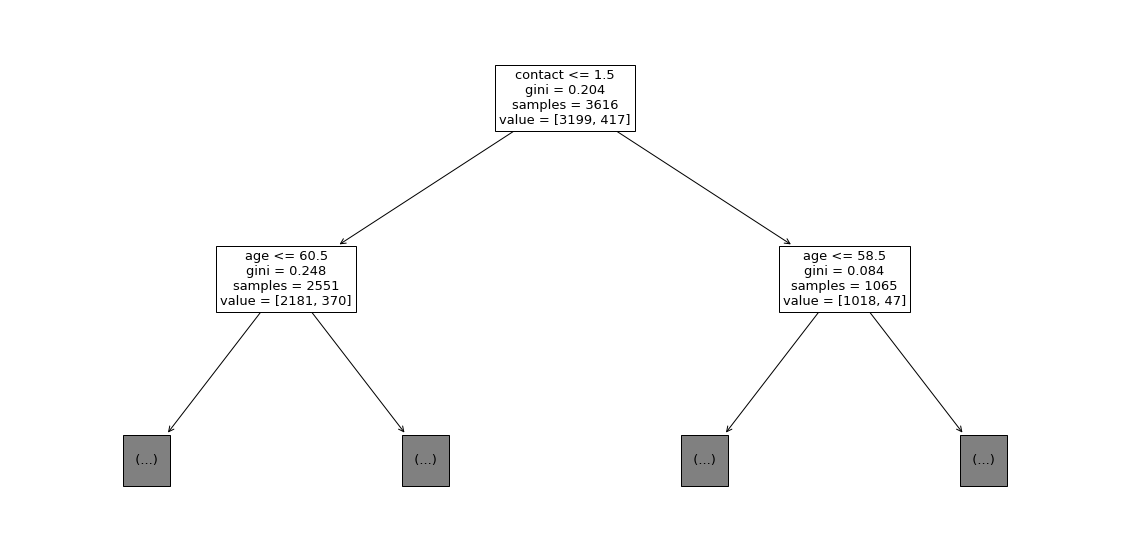

In [27]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(DT_Model1,max_depth=1,fontsize=13,feature_names=Features.columns)



# Pruning the Fully build Decision Tree

In [28]:
# Pruning
plt.rcParams["figure.figsize"] = (20,10)
path = DT_Model1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

<Figure size 1440x720 with 0 Axes>

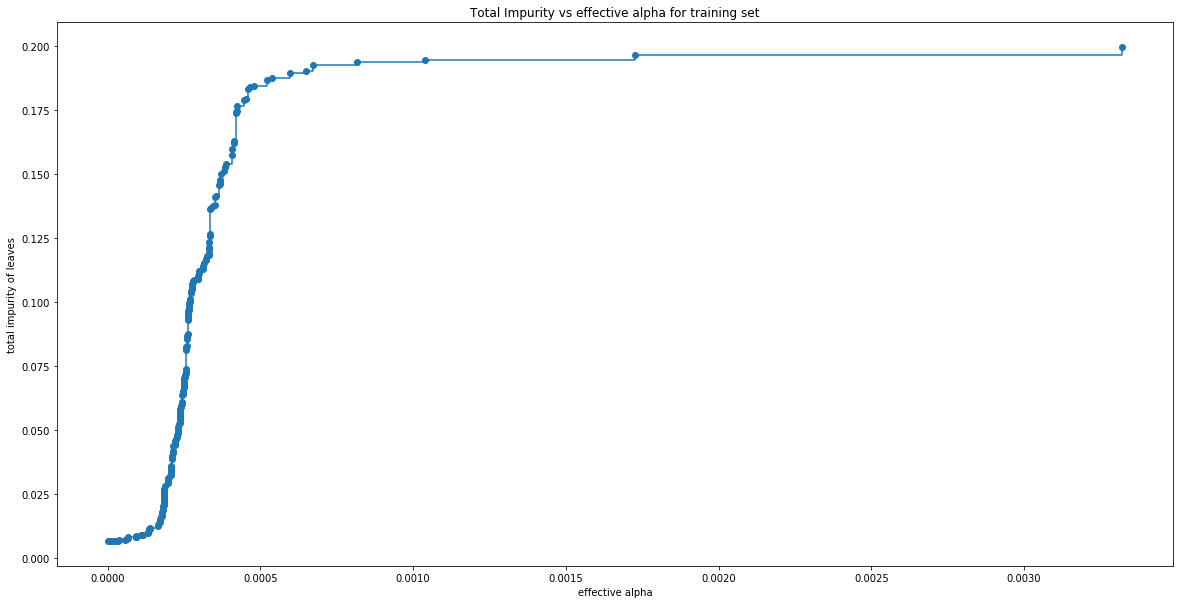

In [29]:

plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.004231546239876399


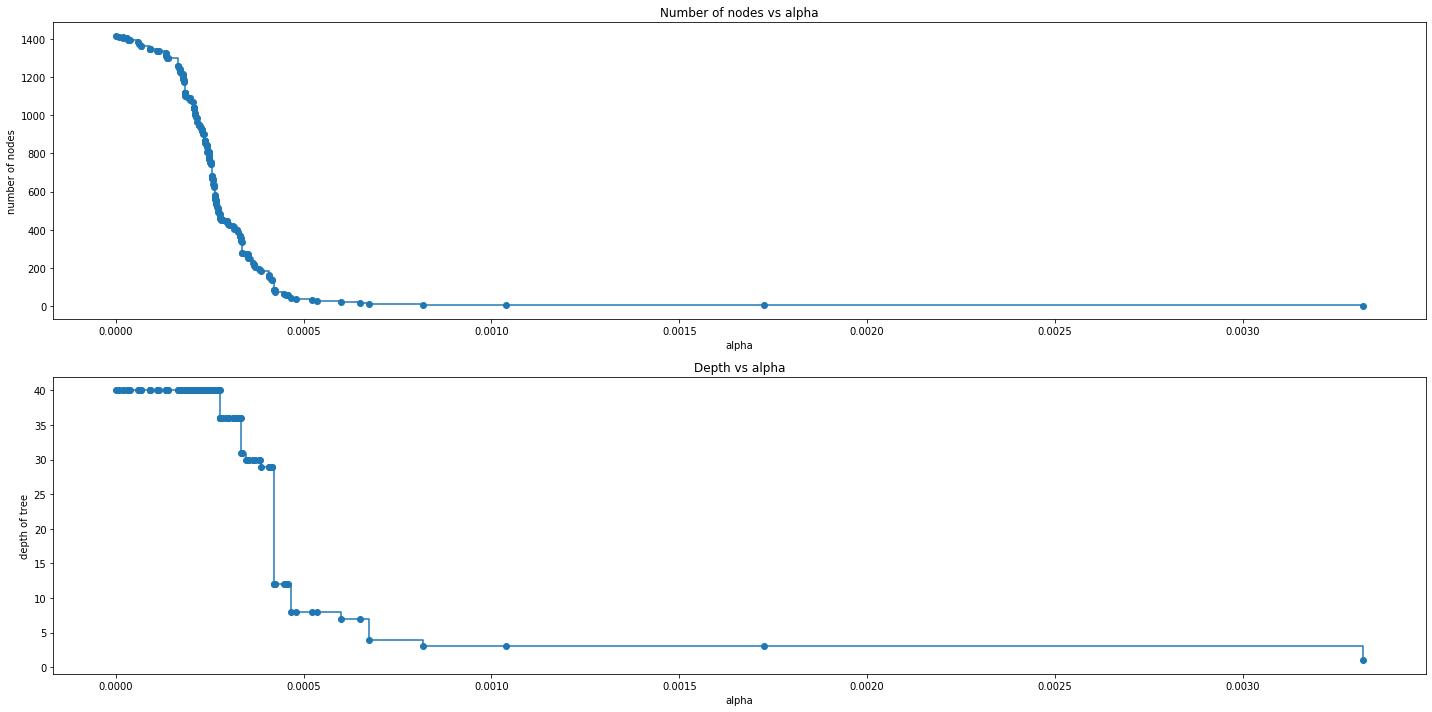

In [31]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

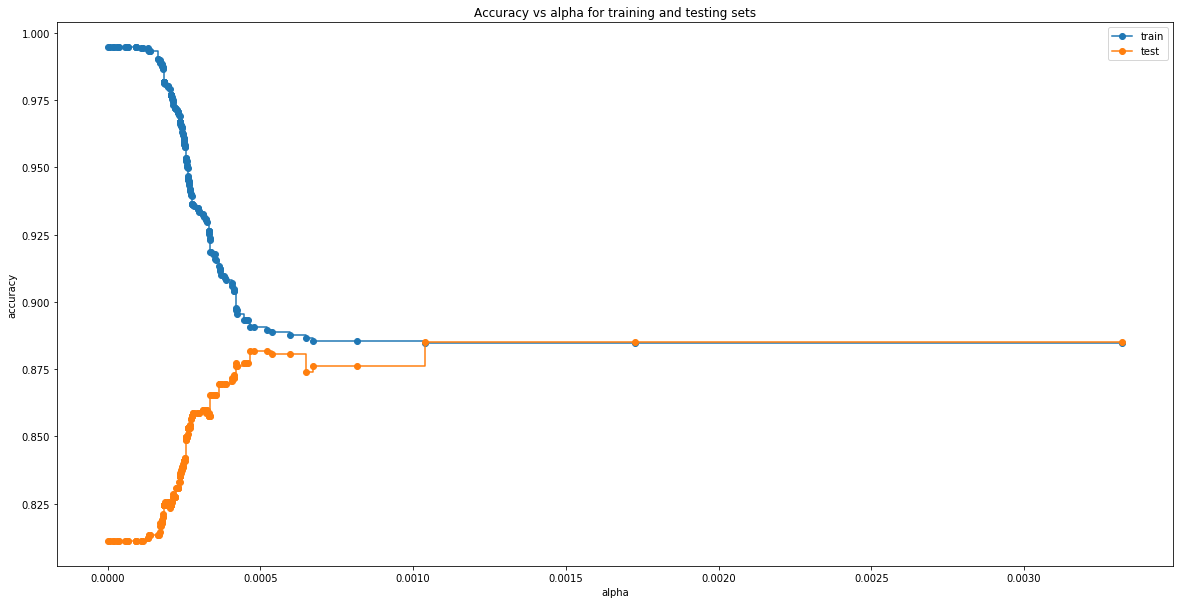

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.00055)

In [34]:
clf.fit(X_train, y_train)

tr_pred  = clf.predict(X_train)
te_pred=  clf.predict(X_test)

In [35]:
get_metircs(y_train,tr_pred)

Confusion Matrix :
 [[3193    6]
 [ 396   21]]
Accuracy Score : 0.8888274336283186
Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3199
           1       0.78      0.05      0.09       417

    accuracy                           0.89      3616
   macro avg       0.83      0.52      0.52      3616
weighted avg       0.88      0.89      0.84      3616



In [36]:
get_metircs(y_test,te_pred)

Confusion Matrix :
 [[797   4]
 [104   0]]
Accuracy Score : 0.8806629834254144
Report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       801
           1       0.00      0.00      0.00       104

    accuracy                           0.88       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.78      0.88      0.83       905



## Up-sampling 

    Using SMOTE (Synthetic Minority Over-sampling Technique)

### Instantiate SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

### Fit Sample

In [38]:
for i in range(0,len(Bank_data.columns)):
    j=Bank_data.columns[i]
    if(j in cat_cols):
        label_encoder = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
        label_encoder.fit(Bank_data[j])
        Bank_data[j]  = label_encoder.transform(Bank_data[j])
        Bank_data[j]  = Bank_data[j].astype('int')

Target   = Bank_data['y']
Features = Bank_data[Bank_data.columns.difference(['y'])]

X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20,stratify=Target)

In [39]:
X_train.dtypes

age        int64
balance    int64
contact    int64
loan       int64
marital    int64
dtype: object

In [40]:
X_train_sm, y_train_sm = smote.fit_resample(X=X_train, y=y_train)

In [41]:
X_train_sm.shape

(6398, 5)

In [42]:
y_train_sm.shape

(6398,)

In [43]:
print(pd.value_counts(y_train_sm, normalize=True) * 100)

1    50.0
0    50.0
Name: y, dtype: float64


## Decision Tree with up-sample data

### Instantiate Model

In [44]:
dtclf2 = tree.DecisionTreeClassifier()

#criterion="entropy", max_depth=2, min_samples_leaf=5, ccp_alpha=0.00055

### Train the model

In [45]:
dtclf2 = dtclf2.fit(X_train_sm, y_train_sm)

### List important features

In [46]:
importances = dtclf2.feature_importances_
importances

array([0.19959549, 0.53014689, 0.17179375, 0.06672185, 0.03174202])

### Predict

In [47]:
train_pred=dtclf2.predict(X_train_sm)
test_pred=dtclf2.predict(X_test)

### Evaluate

In [48]:
print("--Train--")
get_metircs(y_train_sm, train_pred)
print("--Test--")
get_metircs(y_test, test_pred)

--Train--
Confusion Matrix :
 [[3168   31]
 [  60 3139]]
Accuracy Score : 0.9857768052516411
Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3199
           1       0.99      0.98      0.99      3199

    accuracy                           0.99      6398
   macro avg       0.99      0.99      0.99      6398
weighted avg       0.99      0.99      0.99      6398

--Test--
Confusion Matrix :
 [[620 181]
 [ 73  31]]
Accuracy Score : 0.7193370165745856
Report : 
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       801
           1       0.15      0.30      0.20       104

    accuracy                           0.72       905
   macro avg       0.52      0.54      0.51       905
weighted avg       0.81      0.72      0.76       905

